In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [6]:
!kaggle datasets download -d mahnazarjmand/customer-segmentation

100% 340k/340k [00:00<00:00, 670kB/s]
100% 340k/340k [00:00<00:00, 669kB/s]


In [7]:
import zipfile
zip_ref = zipfile.ZipFile('/content/customer-segmentation.zip','r')
zip_ref.extractall('/content')


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [8]:
df = pd.read_csv('/content/Customer_Data (1).csv')
print(df.shape)
df.head()

(8950, 18)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [9]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [10]:
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(),inplace=True)


In [11]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(),inplace=True)


In [12]:
df.value_counts('CASH_ADVANCE_TRX')


CASH_ADVANCE_TRX
0     4628
1      887
2      620
3      436
4      384
      ... 
49       1
47       1
46       1
39       1
53       1
Length: 65, dtype: int64

In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

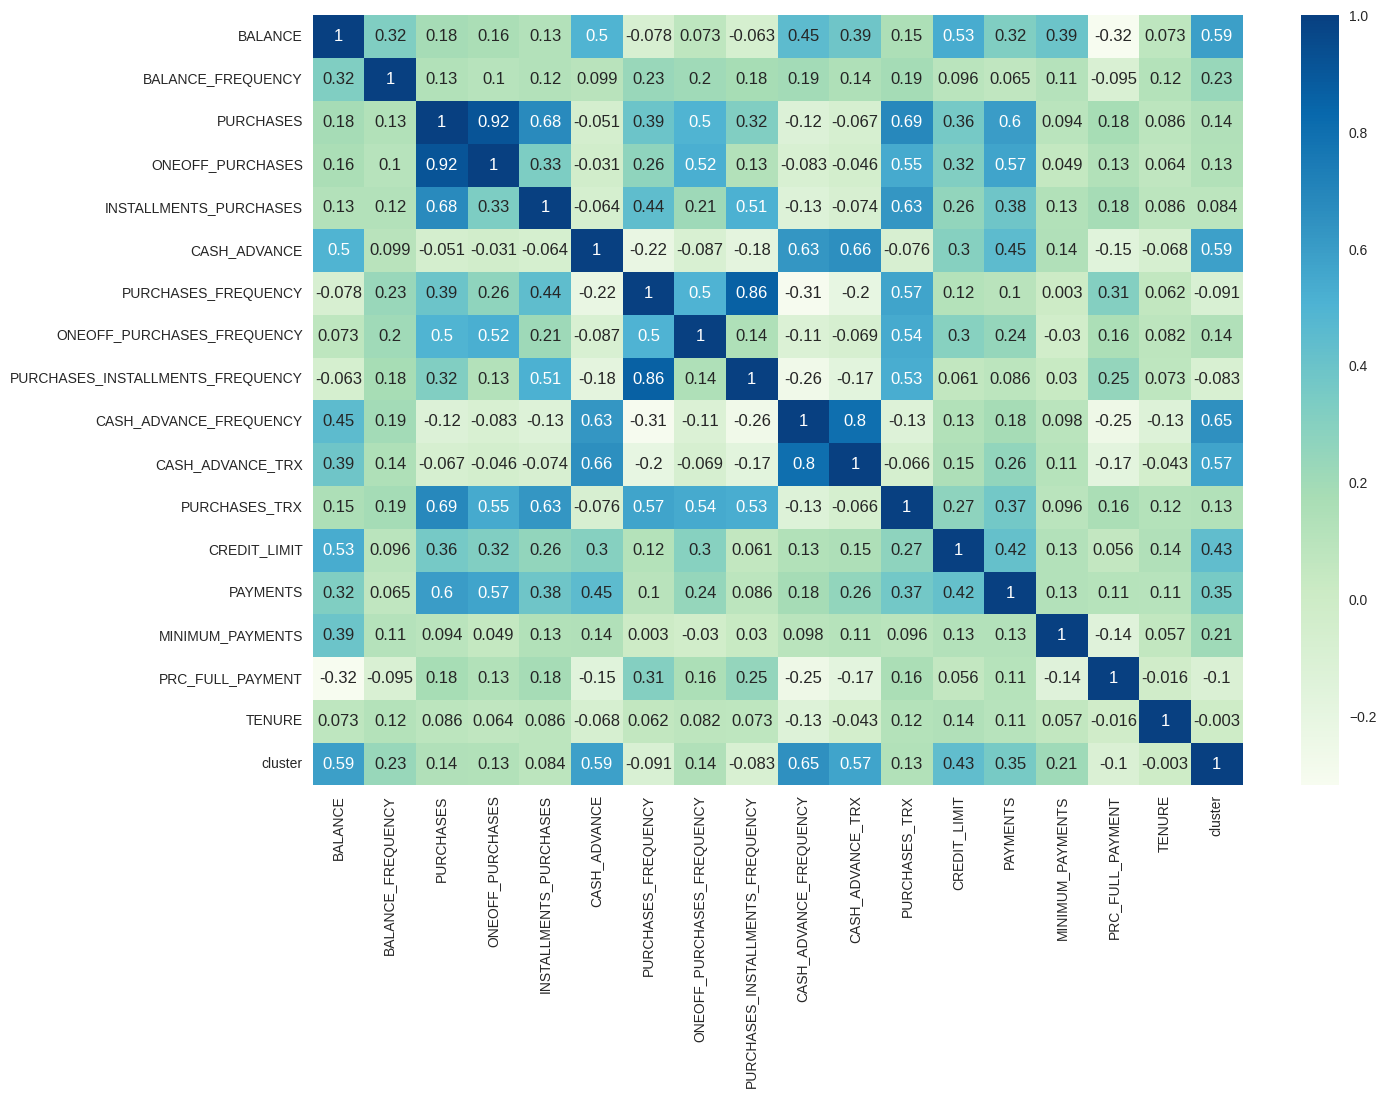

In [44]:
plt.figure(figsize=(15,10))
sns.heatmap(df.drop(columns=['CUST_ID']).corr(),annot=True,cmap='GnBu')
plt.show()

In [15]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [16]:
neumerical_columns=df.drop(columns=['CUST_ID','CASH_ADVANCE_TRX','PURCHASES_TRX','TENURE'])

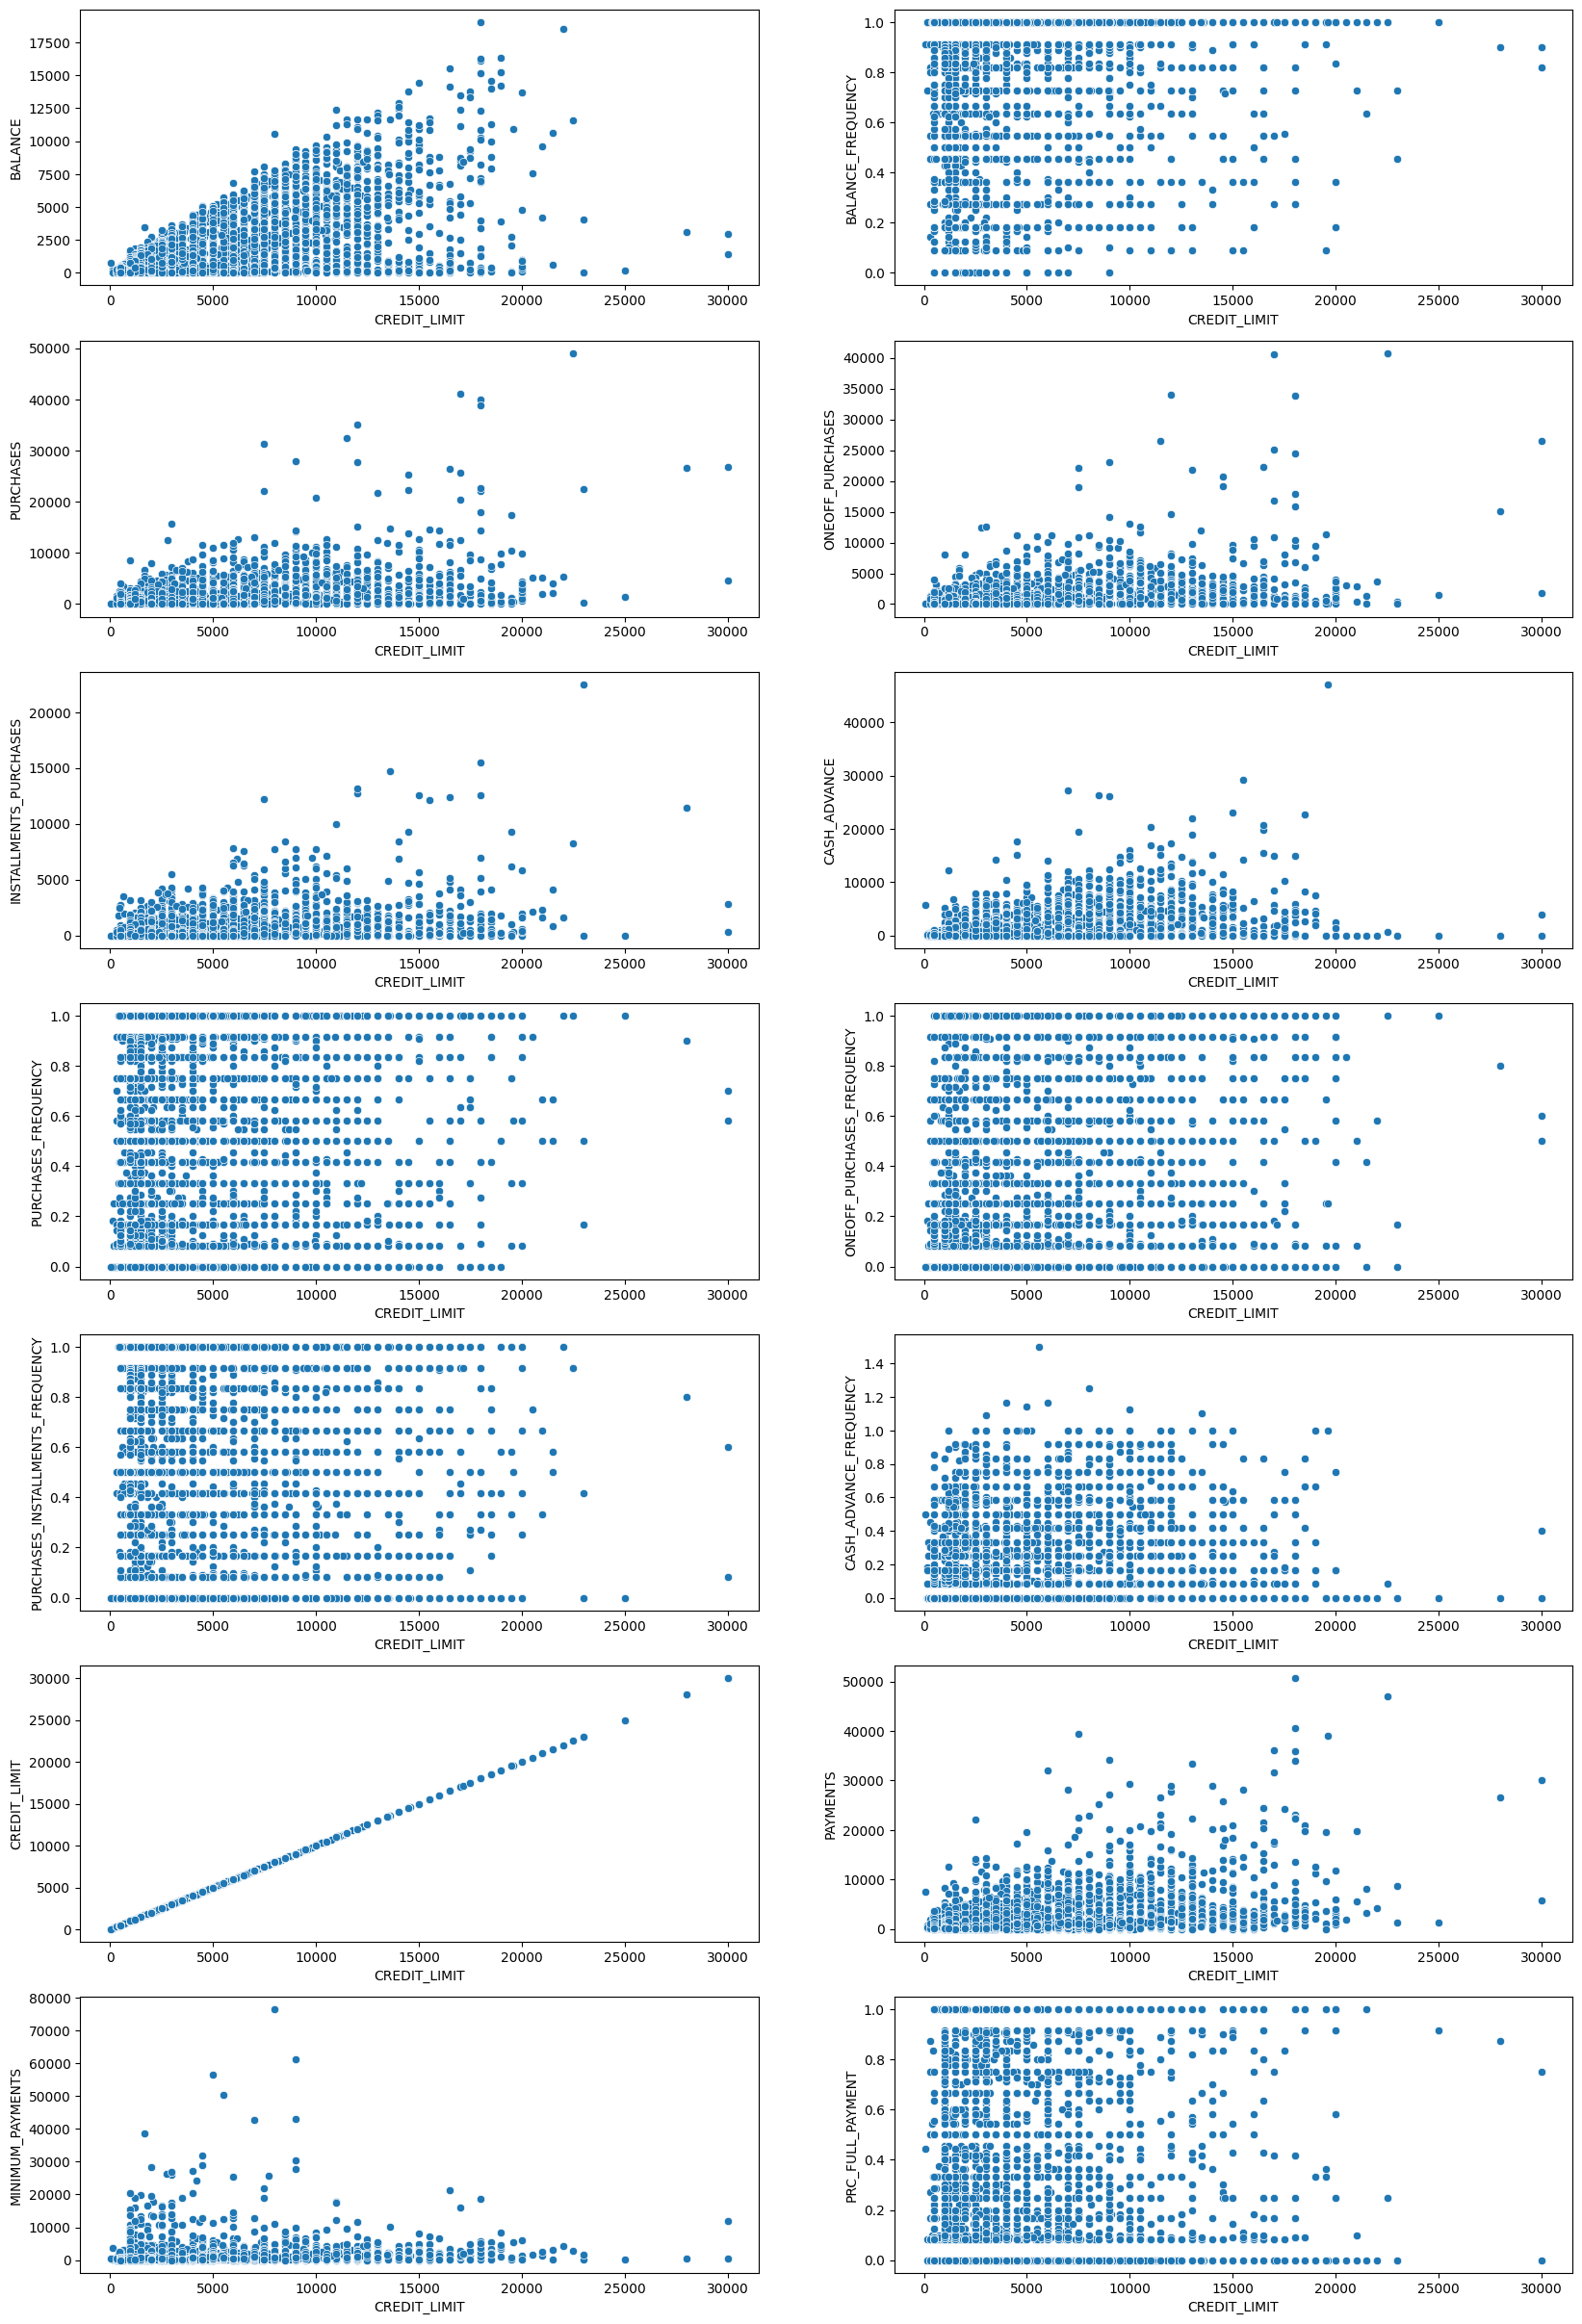

In [17]:
plt.figure(figsize=(20,35))
for i,j in enumerate(neumerical_columns.columns):
    plt.subplot(8,2,i+1)
    sns.scatterplot(x = neumerical_columns['CREDIT_LIMIT'],y=neumerical_columns[j],data=neumerical_columns)
plt.show()

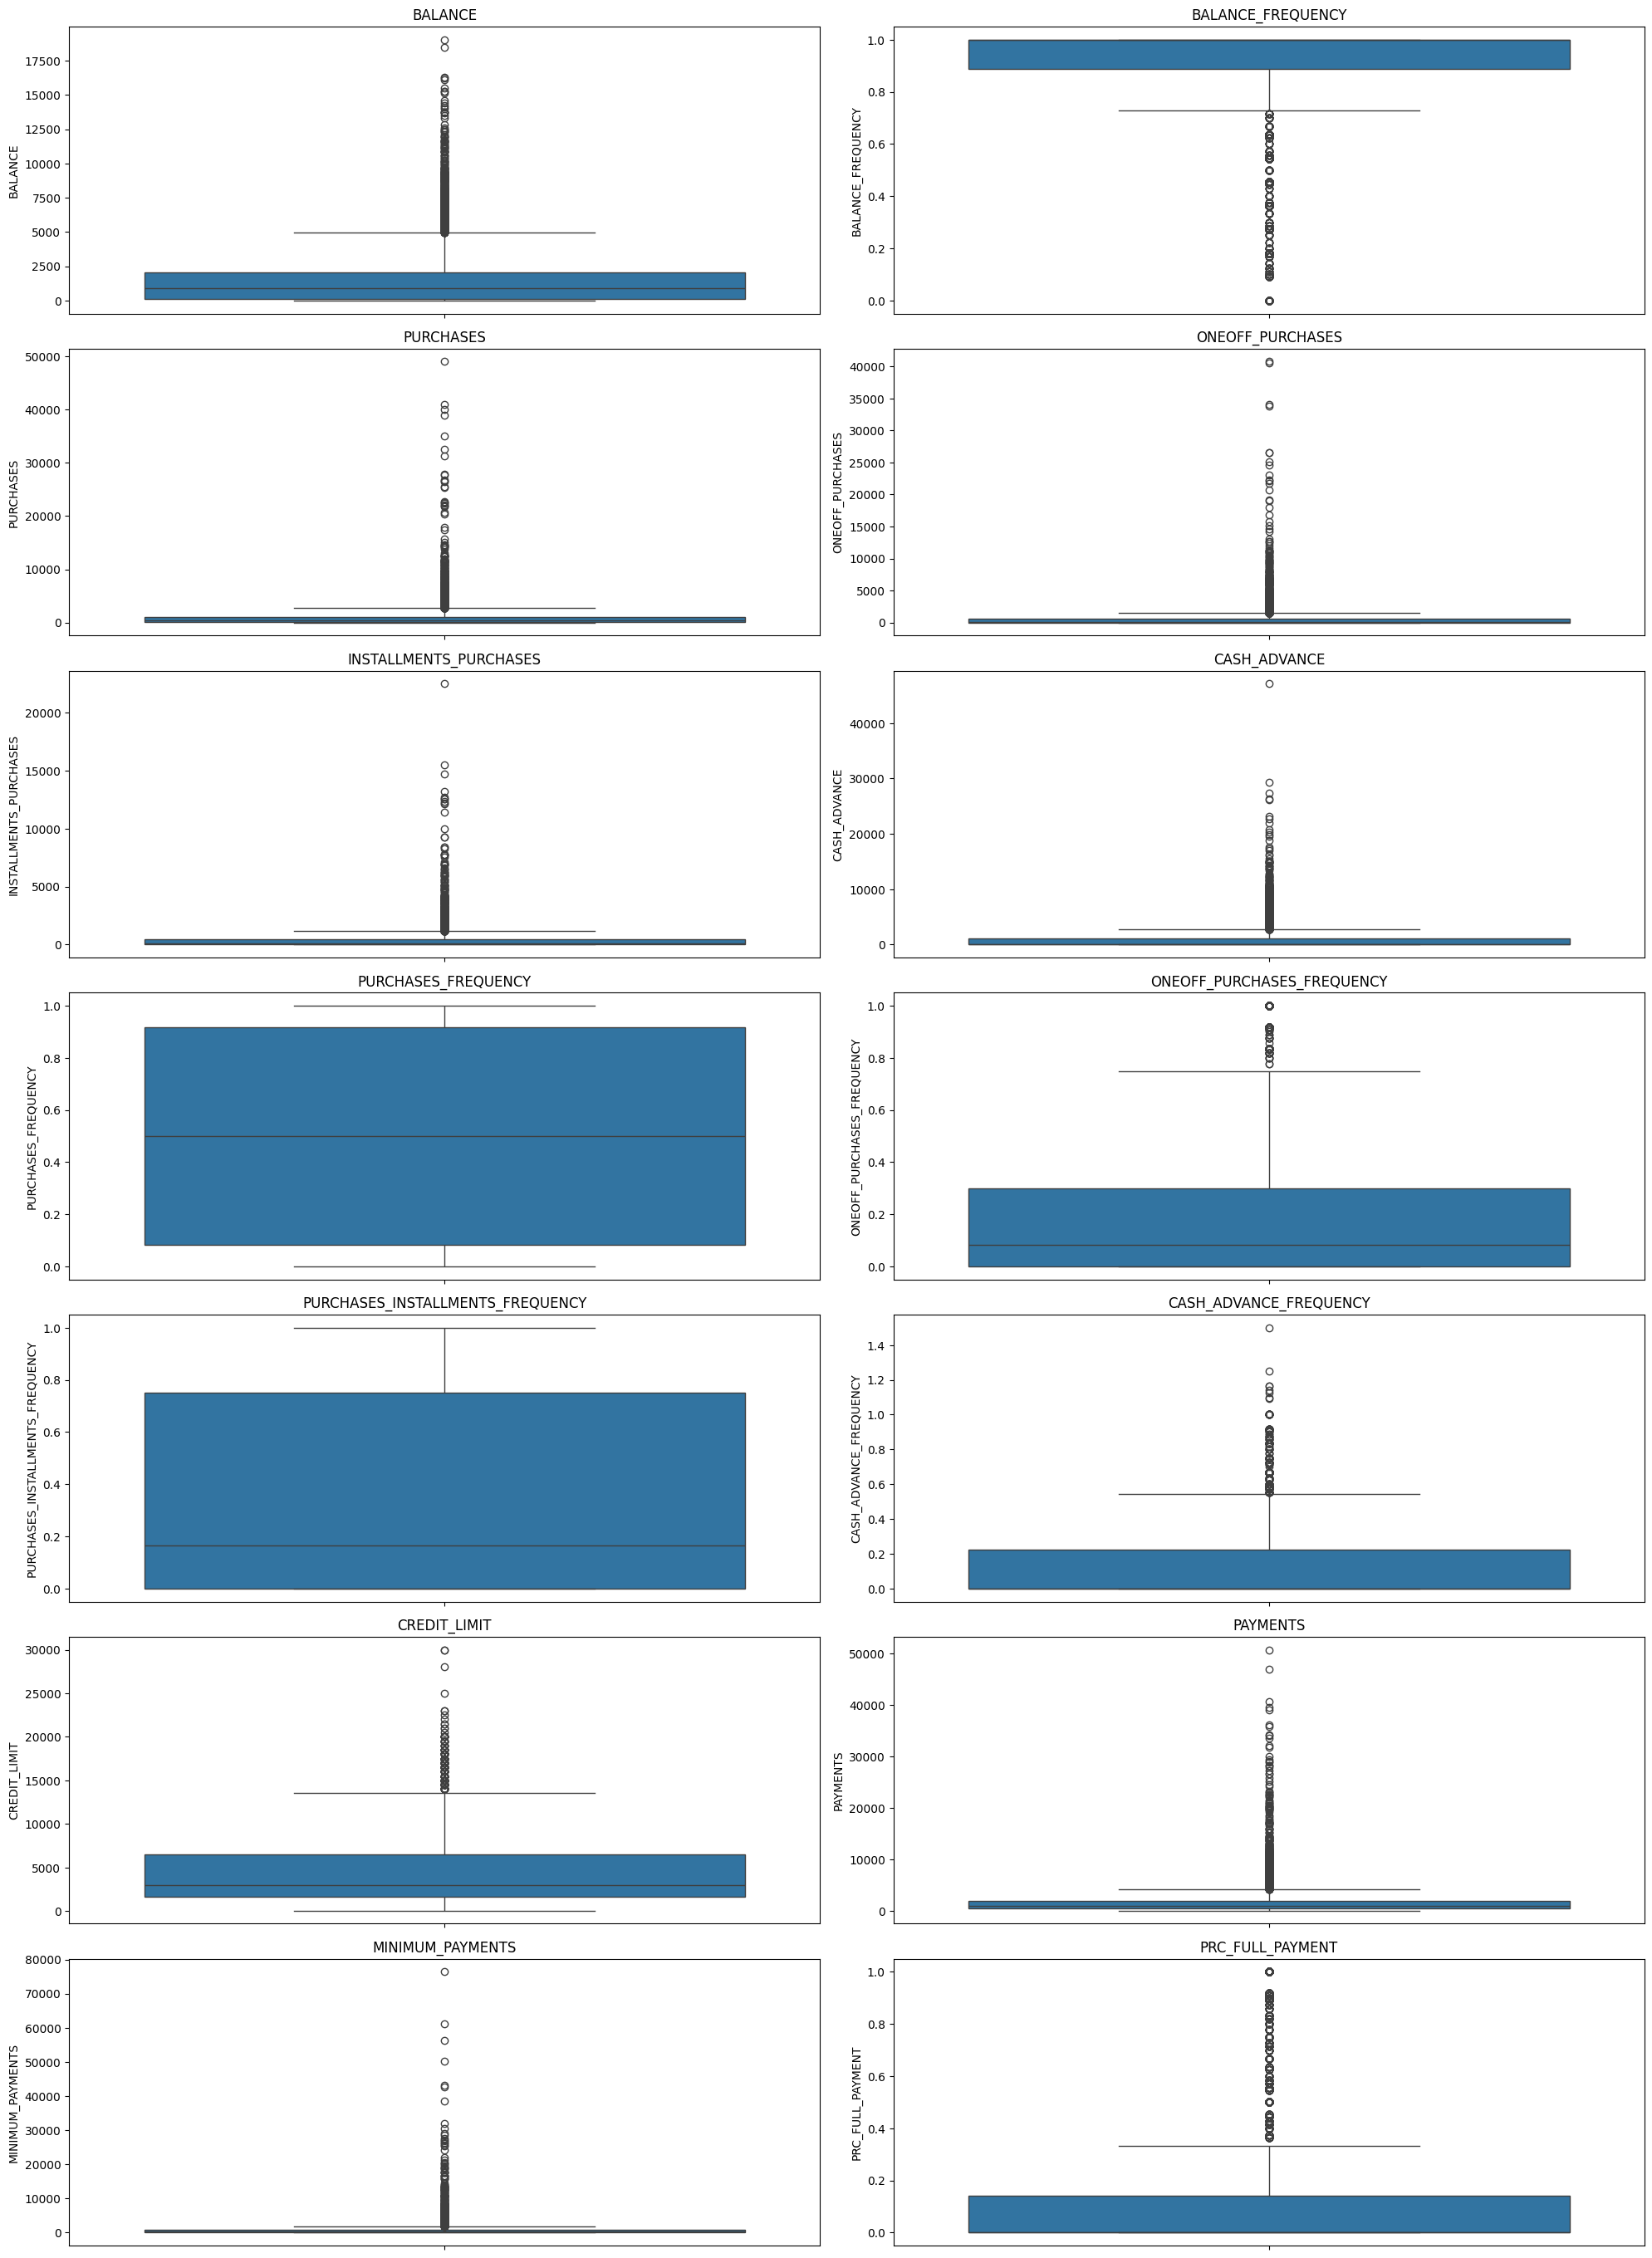

In [18]:
plt.figure(figsize=(20,35))
for i, col in enumerate(neumerical_columns.columns):
    ax = plt.subplot(9, 2, i+1)
    sns.boxplot(neumerical_columns[col],ax=ax)
    plt.title('{}'.format(col))
    plt.tight_layout()

In [19]:
neumerical_columns.skew()


BALANCE                              2.393386
BALANCE_FREQUENCY                   -2.023266
PURCHASES                            8.144269
ONEOFF_PURCHASES                    10.045083
INSTALLMENTS_PURCHASES               7.299120
CASH_ADVANCE                         5.166609
PURCHASES_FREQUENCY                  0.060164
ONEOFF_PURCHASES_FREQUENCY           1.535613
PURCHASES_INSTALLMENTS_FREQUENCY     0.509201
CASH_ADVANCE_FREQUENCY               1.828686
CREDIT_LIMIT                         1.522549
PAYMENTS                             5.907620
MINIMUM_PAYMENTS                    13.867357
PRC_FULL_PAYMENT                     1.942820
dtype: float64

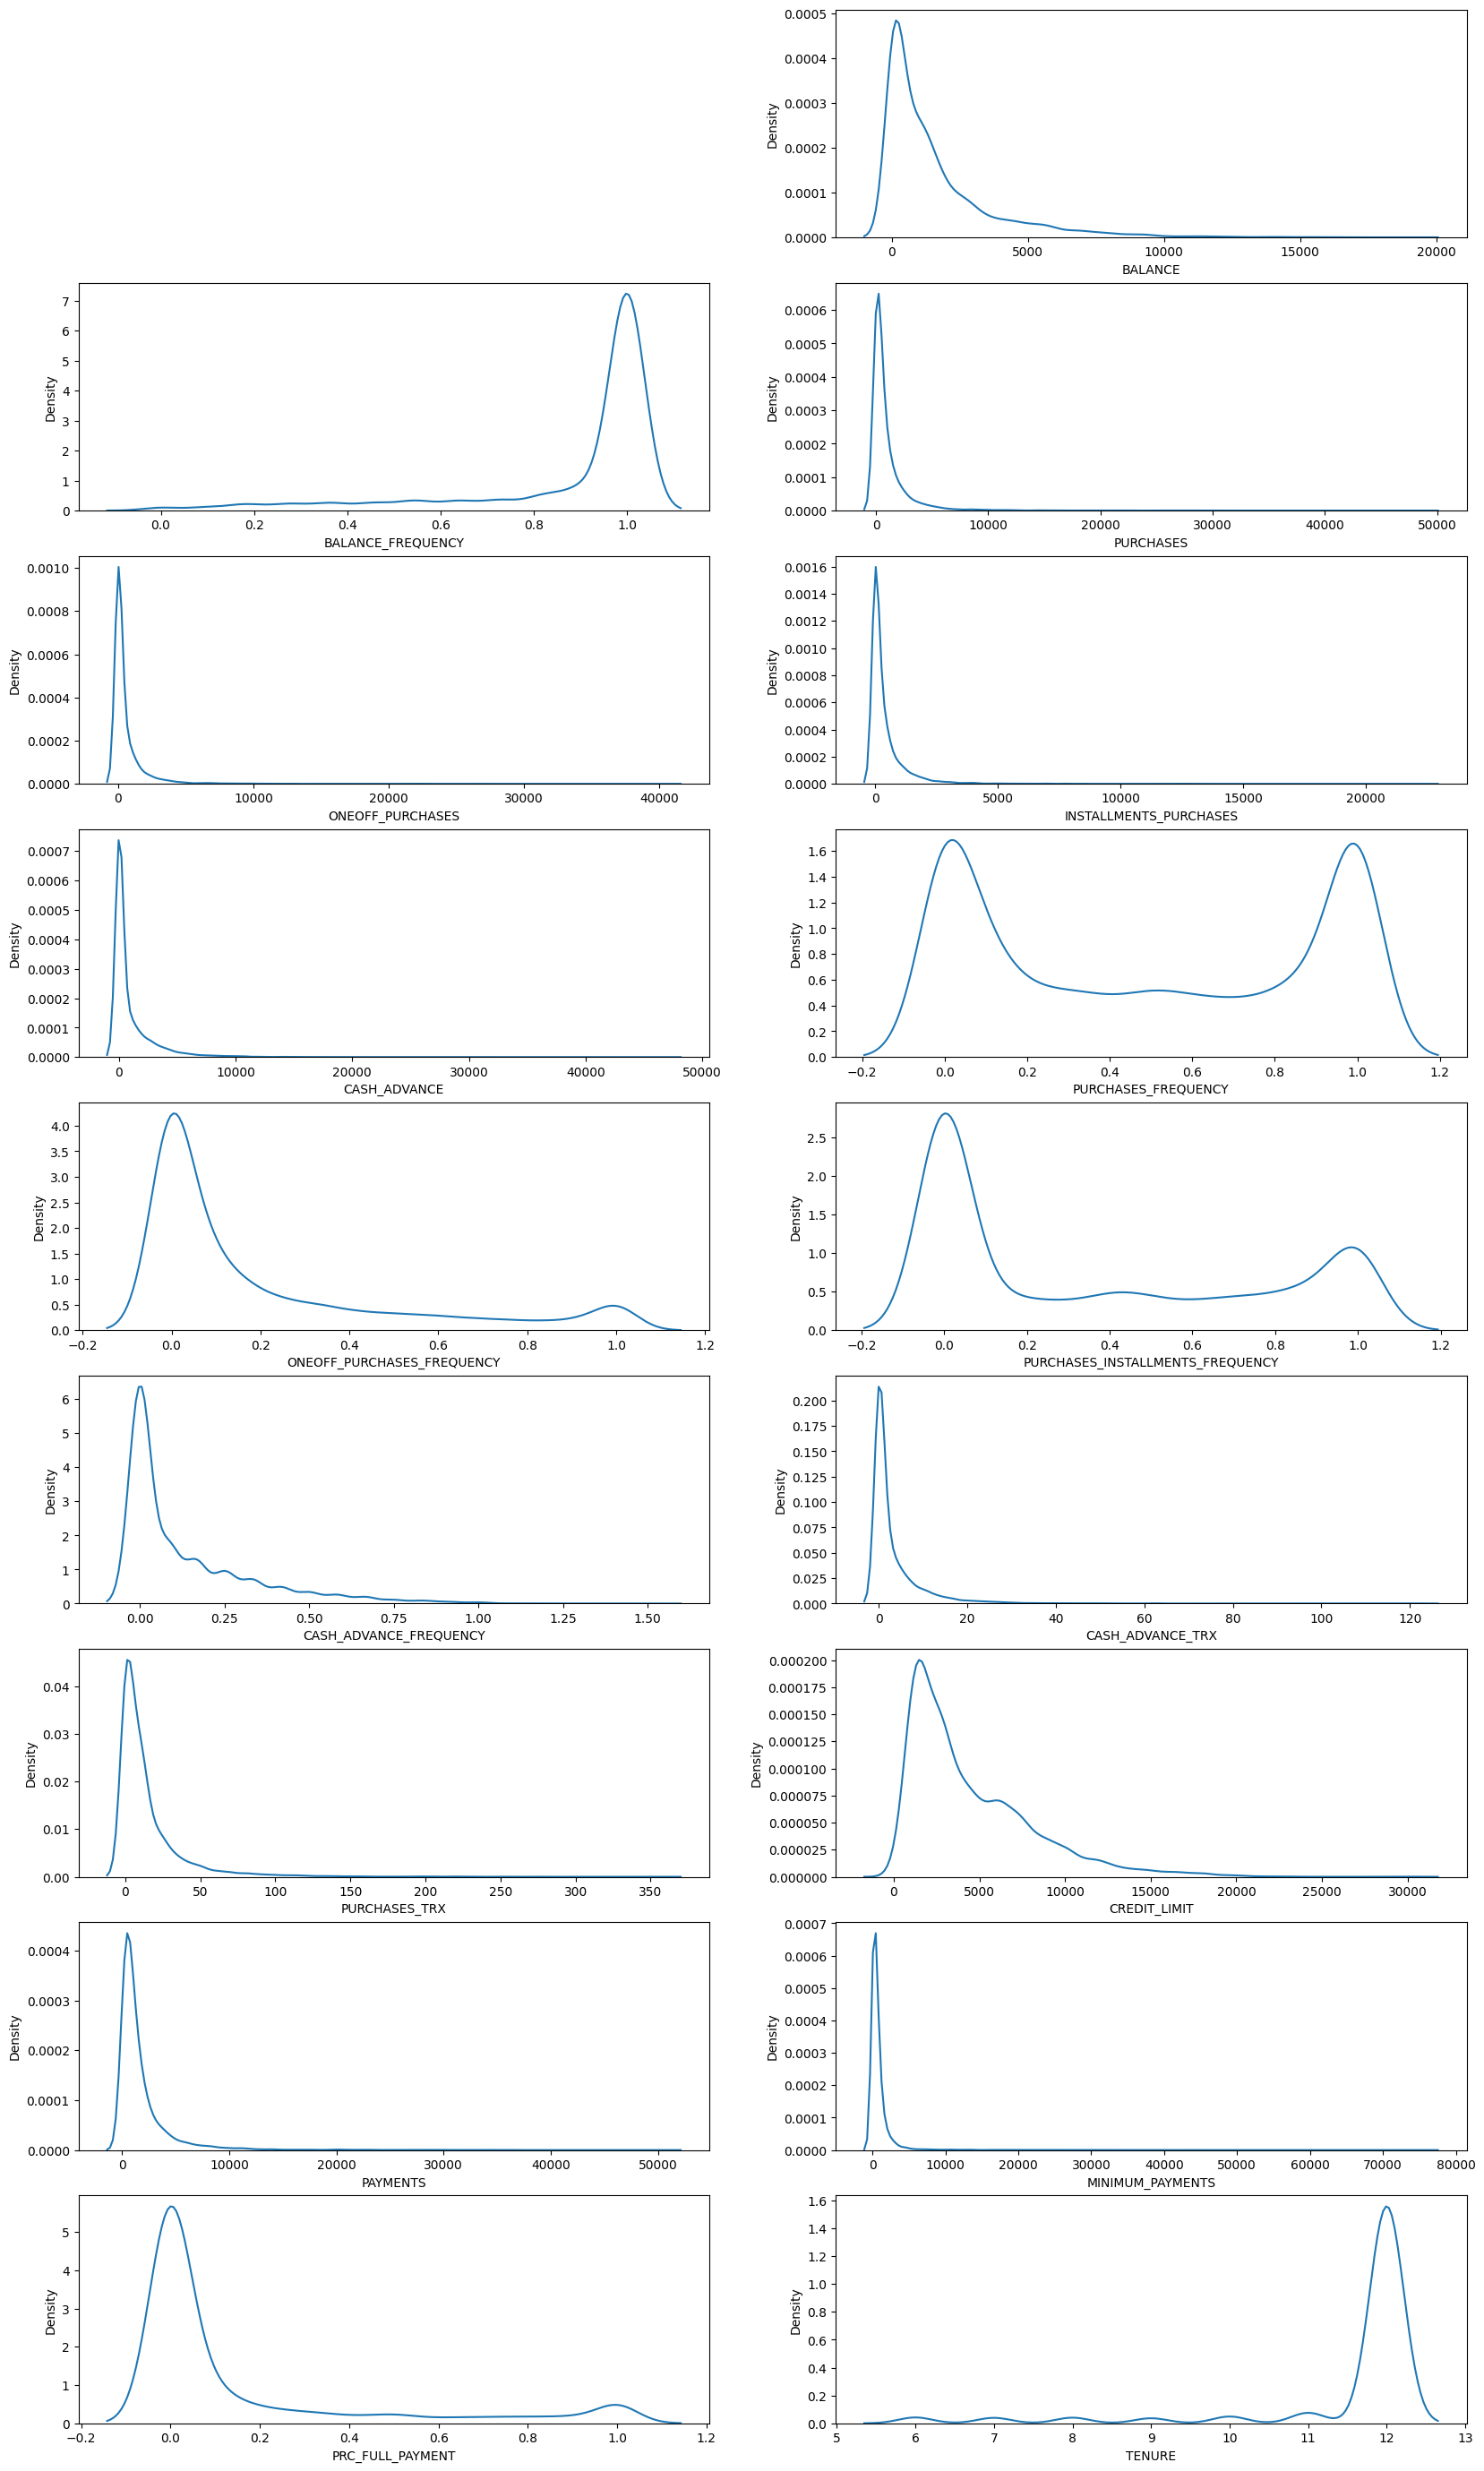

In [20]:
plt.figure(figsize=(20,35))
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(df[col], ax=ax)
        plt.xlabel(col)

plt.show()

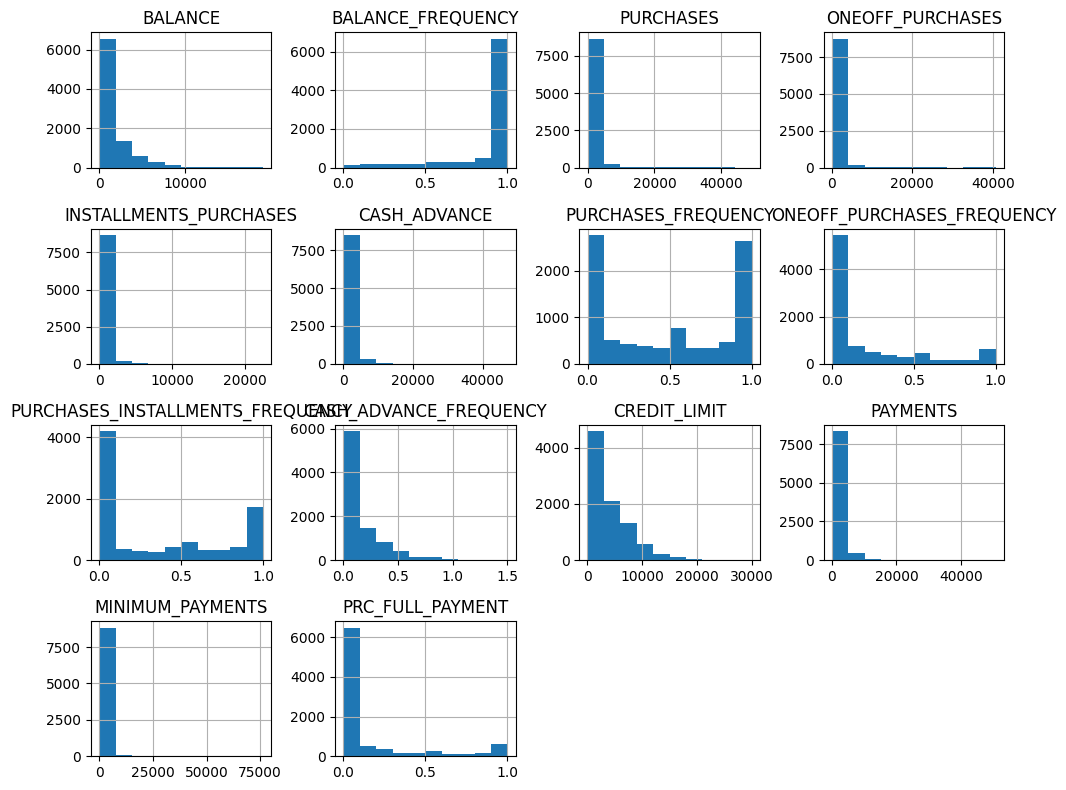

In [21]:
neumerical_columns.hist(figsize=(10,8))
plt.tight_layout()

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

In [23]:
train = df.drop(columns=['CUST_ID'])


In [24]:
sl=StandardScaler()
train_scaled = sl.fit_transform(train)
train_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [25]:
import warnings
warnings.filterwarnings("ignore")
score=[]
for i in range(2,10):
    km = KMeans(n_clusters=i)
    km.fit(train_scaled)
    score.append(km.inertia_)

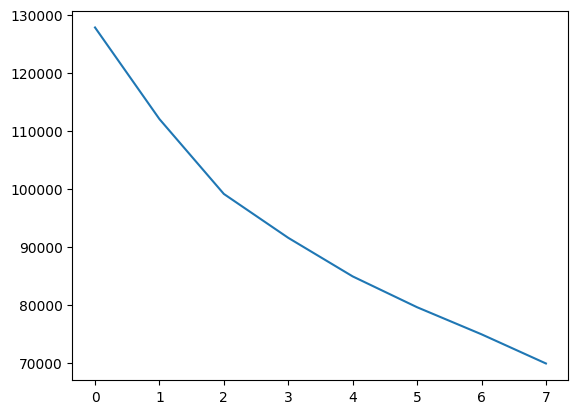

In [26]:
plt.plot(score,)


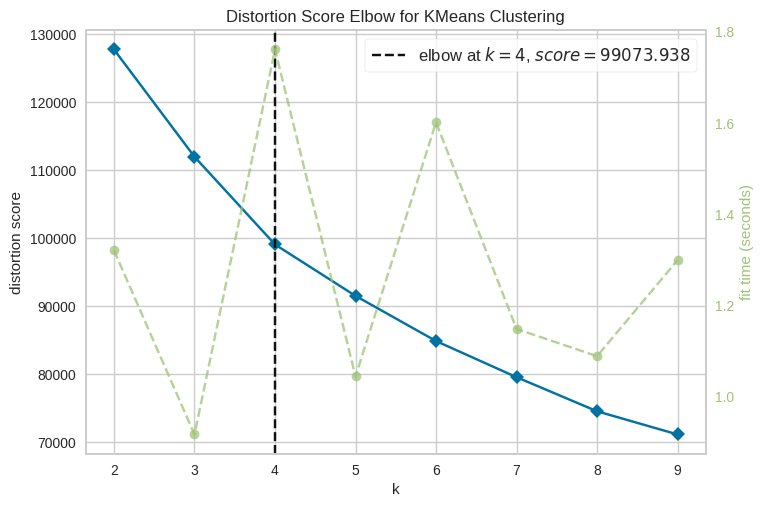

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(n_clusters=i)
visualizer = KElbowVisualizer(model, k=(2,10), timings= True)
visualizer.fit(train_scaled)        # Fit data to visualizer
visualizer.show()

In [28]:
km = KMeans(n_clusters=2, random_state=4)
# Fit the KMeans model
km.fit_predict(train_scaled)
score = silhouette_score(train_scaled, km.labels_, metric='euclidean')
# Print the score
print('Silhouetter Average Score: %.3f' % score)

Silhouetter Average Score: 0.210


In [29]:
#silhouette_score for k=3
km = KMeans(n_clusters=3, random_state=4)
# Fit the KMeans model
km.fit_predict(train_scaled)
score = silhouette_score(train_scaled, km.labels_, metric='euclidean')
# Print the score
print('Silhouetter Average Score: %.3f' % score)

Silhouetter Average Score: 0.251


In [30]:
#silhouette_score for k=4
km = KMeans(n_clusters=4, random_state=4)
# Fit the KMeans model
km.fit_predict(train_scaled)
# Calculate Silhoutte Score
score = silhouette_score(train_scaled, km.labels_, metric='euclidean')
print('Silhouetter Average Score: %.3f' % score)

Silhouetter Average Score: 0.198


In [31]:
#silhouette_score for k=5
km = KMeans(n_clusters=5, random_state=4)
# Fit the KMeans model
km.fit_predict(train_scaled)
# Calculate Silhoutte Score
score = silhouette_score(train_scaled, km.labels_, metric='euclidean')
print('Silhouetter Average Score: %.3f' % score)

Silhouetter Average Score: 0.193


In [32]:
km = KMeans(n_clusters=3)
y = km.fit_predict(train_scaled)

<Axes: ylabel='count'>

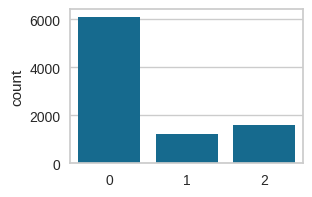

In [33]:
plt.figure(figsize=(3,2),)
sns.countplot(x=y,)

In [34]:
cosine_similarity(train_scaled)


array([[ 1.        , -0.05934809, -0.20246535, ...,  0.08960968,
         0.30661633, -0.04998465],
       [-0.05934809,  1.        , -0.25529205, ..., -0.3218267 ,
        -0.03965274, -0.26348689],
       [-0.20246535, -0.25529205,  1.        , ..., -0.17853768,
        -0.2810273 ,  0.16789428],
       ...,
       [ 0.08960968, -0.3218267 , -0.17853768, ...,  1.        ,
         0.82476948,  0.71805947],
       [ 0.30661633, -0.03965274, -0.2810273 , ...,  0.82476948,
         1.        ,  0.76512732],
       [-0.04998465, -0.26348689,  0.16789428, ...,  0.71805947,
         0.76512732,  1.        ]])

In [35]:
distance = 1-cosine_similarity(train_scaled)
pca = PCA(2)
pca_1_2 = pca.fit_transform(distance)

In [36]:
pca_1_2

array([[-26.34932293, -27.84931273],
       [-24.98419104,  23.69019876],
       [ 17.04794702,  10.08696098],
       ...,
       [  9.37496007,  -9.71457296],
       [-15.82615804,  -5.71706523],
       [  1.23754656,   5.02753403]])

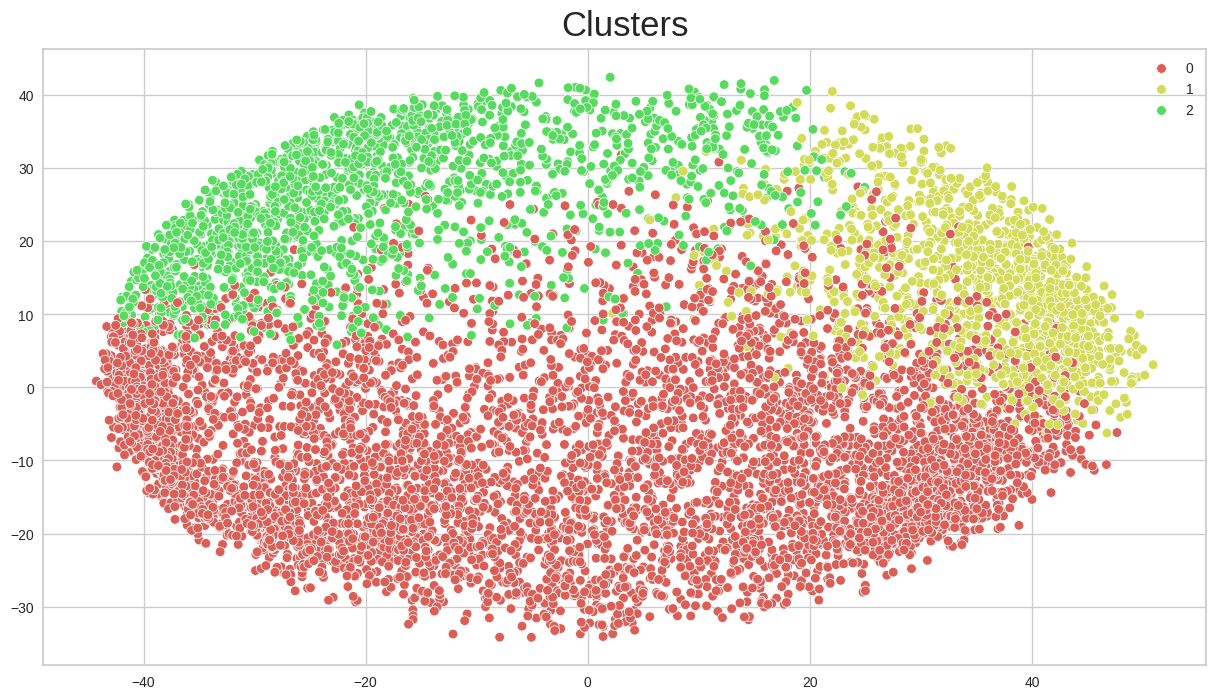

In [37]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=pca_1_2[:, 0], y=pca_1_2[:, 1],hue=y,palette=sns.color_palette('hls'))
plt.title('Clusters', size=25, pad=10)
plt.legend(loc=0, bbox_to_anchor=[1,1])
plt.show()

In [38]:
df['cluster'] = y

In [39]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [40]:
no_of_clusters = df.groupby(by='cluster')
mean_crtedit_values = no_of_clusters['CREDIT_LIMIT'].mean()
mean_balance_values = no_of_clusters['BALANCE'].mean()
mean_purchase_values = no_of_clusters['PURCHASES'].mean()

In [41]:
mean_list = [mean_crtedit_values,mean_balance_values,mean_purchase_values]

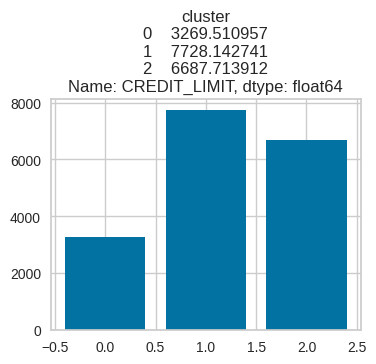

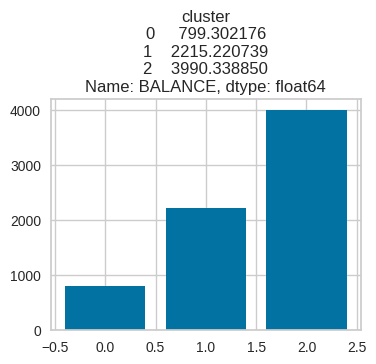

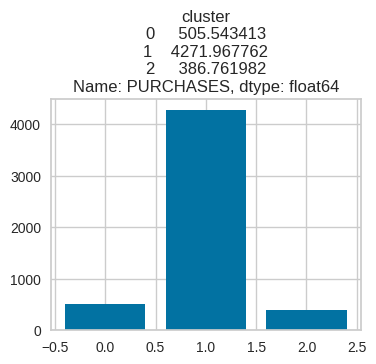

In [42]:
for i in mean_list:
    plt.figure(figsize=(4,3))
    plt.bar(i.index,i.values)
    plt.title("{}".format(i))